# SVM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import time

In [2]:
# Import dataframe from JSON file
jsonStr = "parameters_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.tail)

<bound method NDFrame.tail of                                                  red   green    blue  \
data/9036/0/9036_idx5_x1051_y2401_class0.png  3.0528  2.3076  2.3516   
data/9036/0/9036_idx5_x2951_y951_class0.png   2.0684  2.5360  2.5404   
data/9036/0/9036_idx5_x3001_y1451_class0.png  2.7024  2.8000  2.4032   
data/9036/0/9036_idx5_x3051_y801_class0.png   2.5140  2.2112  2.6992   
data/9036/0/9036_idx5_x951_y1901_class0.png   2.7728  2.5544  2.3368   
...                                              ...     ...     ...   
data/9037/1/9037_idx5_x2051_y201_class1.png   2.6768  2.5504  2.4840   
data/9037/1/9037_idx5_x1301_y301_class1.png   2.3604  2.1788  2.7524   
data/9037/1/9037_idx5_x1651_y851_class1.png   2.8944  2.7236  2.4576   
data/9037/1/9037_idx5_x1301_y401_class1.png   2.2180  2.6368  2.4044   
data/9037/1/9037_idx5_x1401_y801_class1.png   2.7832  2.4880  2.4188   

                                              gray_avg  gray_var  edges  group  
data/9036/0/9036_idx5_x1

In [3]:
X= df[['red','green','blue','gray_avg','gray_var','edges']]
y=df['group']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=False)

print('X_train : ')
print(X_train.head())
print(X_train.shape)
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print('')
print('X_val : ')
print(X_val.head())
print(X_val.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)
print('')
print('y_val : ')
print(y_val.head())
print(y_val.shape)

X_train : 
                                                 red   green    blue  \
data/9036/0/9036_idx5_x1051_y2401_class0.png  3.0528  2.3076  2.3516   
data/9036/0/9036_idx5_x2951_y951_class0.png   2.0684  2.5360  2.5404   
data/9036/0/9036_idx5_x3001_y1451_class0.png  2.7024  2.8000  2.4032   
data/9036/0/9036_idx5_x3051_y801_class0.png   2.5140  2.2112  2.6992   
data/9036/0/9036_idx5_x951_y1901_class0.png   2.7728  2.5544  2.3368   

                                              gray_avg  gray_var  edges  
data/9036/0/9036_idx5_x1051_y2401_class0.png  0.680398  0.042388    409  
data/9036/0/9036_idx5_x2951_y951_class0.png   0.803280  0.023050    306  
data/9036/0/9036_idx5_x3001_y1451_class0.png  0.669149  0.015657    417  
data/9036/0/9036_idx5_x3051_y801_class0.png   0.564788  0.010467    319  
data/9036/0/9036_idx5_x951_y1901_class0.png   0.764039  0.016836    526  
(22463, 6)

X_test : 
                                                   red   green    blue  \
data/12934/0/129

## SVM
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Youtube: https://www.youtube.com/watch?v=zEabrO9l1vg, https://www.youtube.com/watch?v=FB5EdxAGxQg

### Linear Kernel SVM
Tuning with the validation set and trying with different values of C, to afterwards use with the test set

In [ ]:
st = time.time()

acc_c = []
start = 1
stop = 10
step = 2
for c in [0.1,0.5,1,5,10]:
    st0 = time.time()
    
    linear_model = svm.SVC(kernel='linear', C=c, decision_function_shape='ovo').fit(X_train, y_train)
    y_pred = linear_model.predict(X_val)
    
    accuracy_lin = accuracy_score(y_val, y_pred)
    acc_c.append(accuracy_lin)
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_lin, elapsed0)
    
    
plt.plot([0.1,0.5,1,5,10], acc_c)
plt.show()

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

0.00018405914306640625
778.4425570964813
779.6179208755493
Accuracy Linear Kernel: 0.6997507011530072


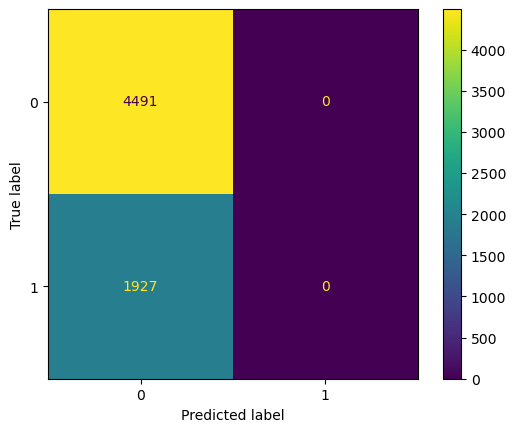

In [9]:
# LINEAR KERNEL SVM WITH C = 
st = time.time()

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
et = time.time()
print(et-st)
linear.fit(X_train, y_train)
et = time.time()
print(et-st)
linear_pred = linear.predict(X_test)
et = time.time()
print(et-st)

# Accuracy
accuracy_lin = linear.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)

# Confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
ConfusionMatrixDisplay.from_predictions(y_test,linear_pred)

### Radial Basis Function Kernel SVM
Tuning with the validation set and trying with different values of C, to afterwards use with the test set

0.1 0.7858923230309073 20.769062757492065
0.5 0.7858923230309073 20.878252029418945
1 0.7858923230309073 20.88246726989746
5 0.7858923230309073 23.412653923034668
10 0.7858923230309073 24.089492797851562


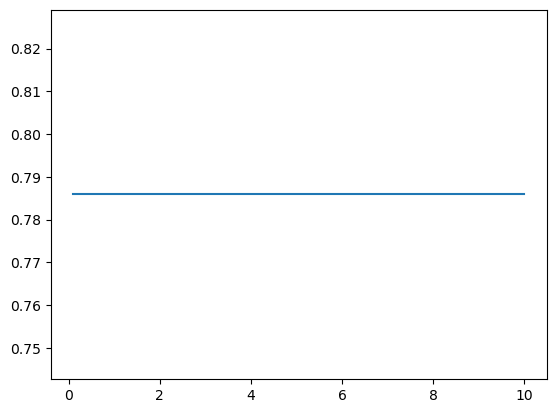

0.7858923230309073
Execution time: 110.27903270721436 seconds


In [4]:
st = time.time()

acc_c = []
for c in [0.1,0.5,1,5,10]:
    st0 = time.time()
    rbf_model = svm.SVC(kernel='rbf', C=c, decision_function_shape='ovo').fit(X_train, y_train)
    y_pred = rbf_model.predict(X_val)
    
    accuracy_rbf = accuracy_score(y_val, y_pred)
    
    acc_c.append(accuracy_rbf)
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_rbf, elapsed0)
    
plt.plot([0.1,0.5,1,5,10], acc_c)
plt.show()
print(max(acc_c))

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

In [ ]:
# RBF
rbf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')
rbf.fit(X_train, y_train)

# Accuracy 0.7923028980990963
rbf_pred = rbf.predict(X_test)
accuracy_rbf = rbf.score(X_test, y_test)
print('Accuracy RBF Kernel:', accuracy_rbf)

# Confusion matrix 
cm_rbf = confusion_matrix(y_test, rbf_pred)
ConfusionMatrixDisplay.from_predictions(y_test,rbf_pred)

### Polynomial Kernel SVM
Tuning with the validation set and trying with different values of C, to afterwards use with the test set

0.1 0.7865378622623871 20.078919887542725
0.5 0.7865378622623871 24.993197917938232
1 0.7865378622623871 43.60952115058899
5 0.7865378622623871 172.78747582435608
10 0.7865378622623871 517.7333879470825
20 0.7865378622623871 1178.792807340622


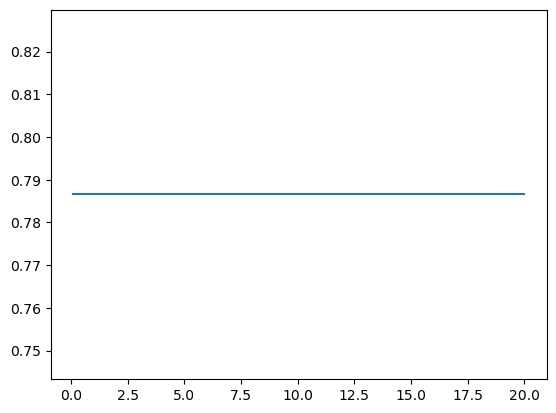

In [7]:
acc_c = []
for c in [0.1,0.5,1,5,10,20]:
    st0 = time.time()
    poly_model = svm.SVC(kernel='poly', C=c, decision_function_shape='ovo').fit(X_train, y_train)
    y_pred = poly_model.predict(X_val)
    
    accuracy_poly = accuracy_score(y_val, y_pred)
    
    acc_c.append(accuracy_poly)
    et0 = time.time()
    elapsed0 = et0-st0
    print(c, accuracy_poly, elapsed0)
    
plt.plot([0.1,0.5,1,5,10,20], acc_c)
plt.show()

Accuracy Polynomial Kernel: 0.6997507011530072


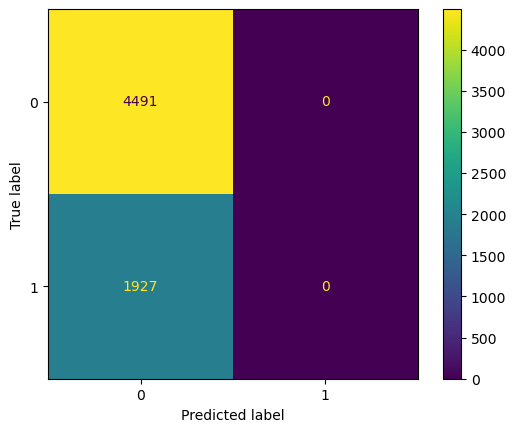

In [4]:
# Polynomial
poly = svm.SVC(kernel='poly', degree=3, gamma='scale', C=1, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
poly_pred = poly.predict(X_test)
accuracy_poly = poly.score(X_test, y_test)
print('Accuracy Polynomial Kernel:', accuracy_poly)

# Confusion matrix
cm_poly = confusion_matrix(y_test, poly_pred)
ConfusionMatrixDisplay.from_predictions(y_test,poly_pred)